## Homework 1: Part I: Regression Modeling with the Prostate Cancer Data ## 

Load libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Load data

In [3]:
df = pd.read_csv("prostate.csv")

Dimensions

In [4]:
df.shape

(97, 11)

Column Names

In [5]:
df.columns.tolist()

['id',
 'lcavol',
 'lweight',
 'age',
 'lbph',
 'svi',
 'lcp',
 'gleason',
 'pgg45',
 'lpsa',
 'train']

Data Types

In [6]:
df.dtypes

id           int64
lcavol     float64
lweight    float64
age          int64
lbph       float64
svi          int64
lcp        float64
gleason      int64
pgg45        int64
lpsa       float64
train       object
dtype: object

First few rows

In [7]:
df.head()

,id,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


Check missing values

In [8]:
df.isna().sum()

id         0
lcavol     0
lweight    0
age        0
lbph       0
svi        0
lcp        0
gleason    0
pgg45      0
lpsa       0
train      0
dtype: int64

Exploratory Data Analysis (EDA)

Summary Statistics

In [9]:
df.describe()

,id,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,49.000000,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,28.145456,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329
min,1.000000,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783
25%,25.000000,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656
50%,49.000000,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516
75%,73.000000,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357
max,97.000000,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932


Clean Data

In [10]:
# Drop id and train columns
clean_cols = df.drop(columns=["id", "train"]).columns

Distributions

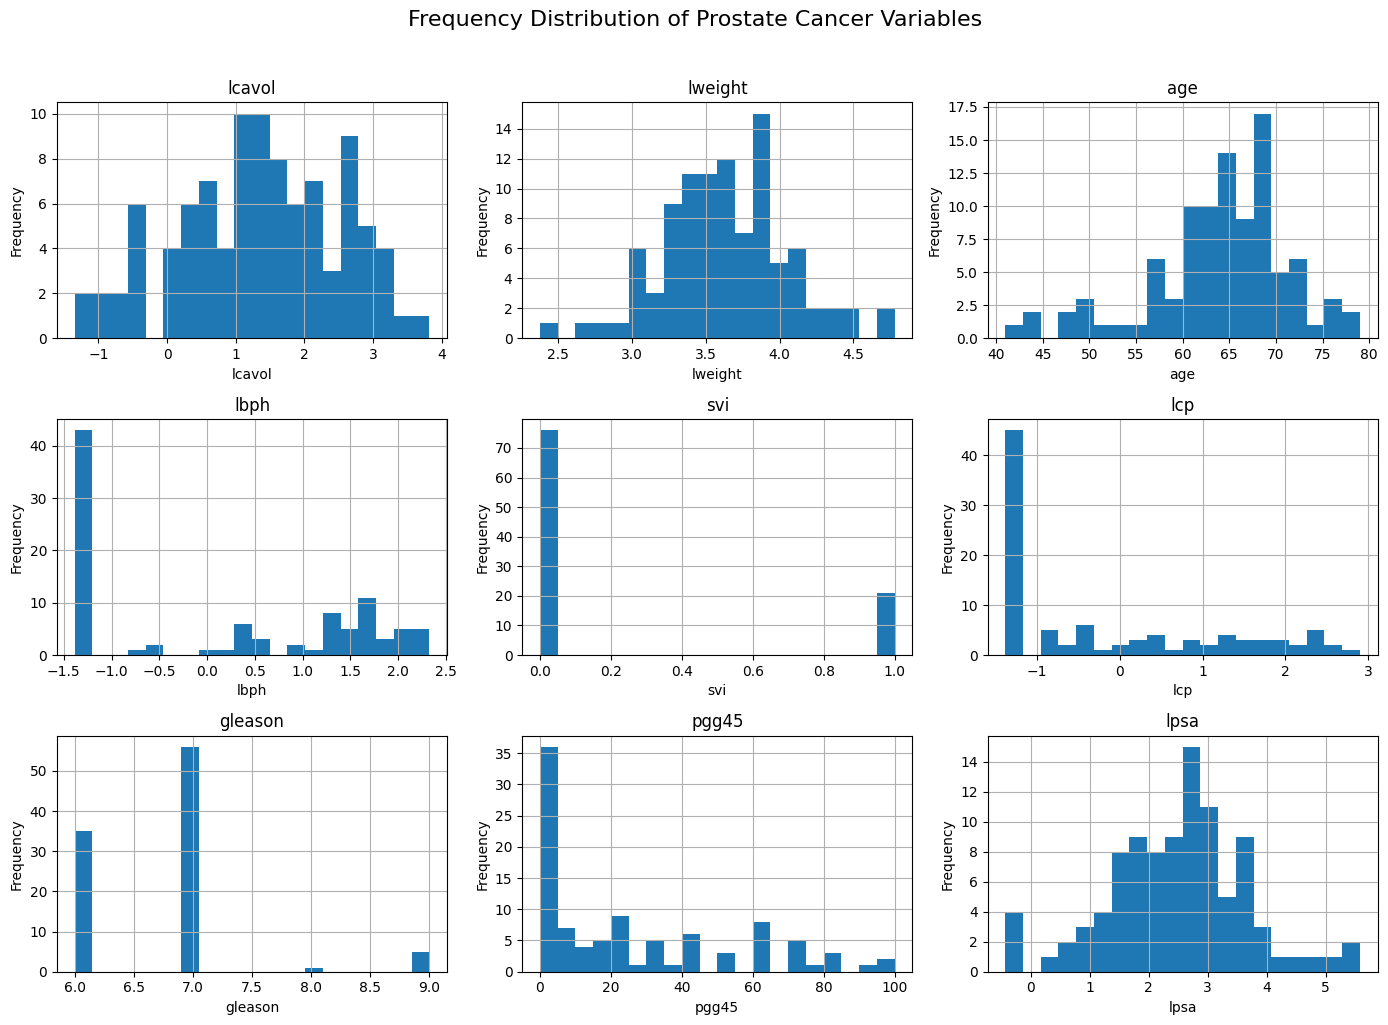

In [11]:
axes = df[clean_cols].hist(figsize=(14, 10), bins=20)

# Add axis label for each
for ax, col in zip(axes.flatten(), clean_cols):
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

# Add title
plt.suptitle("Frequency Distribution of Prostate Cancer Variables", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


Pairplot Matrix

- Diagonal: distribution of each variable (orange = test, blue = train)

- Off-diagonal: pairwise relationships

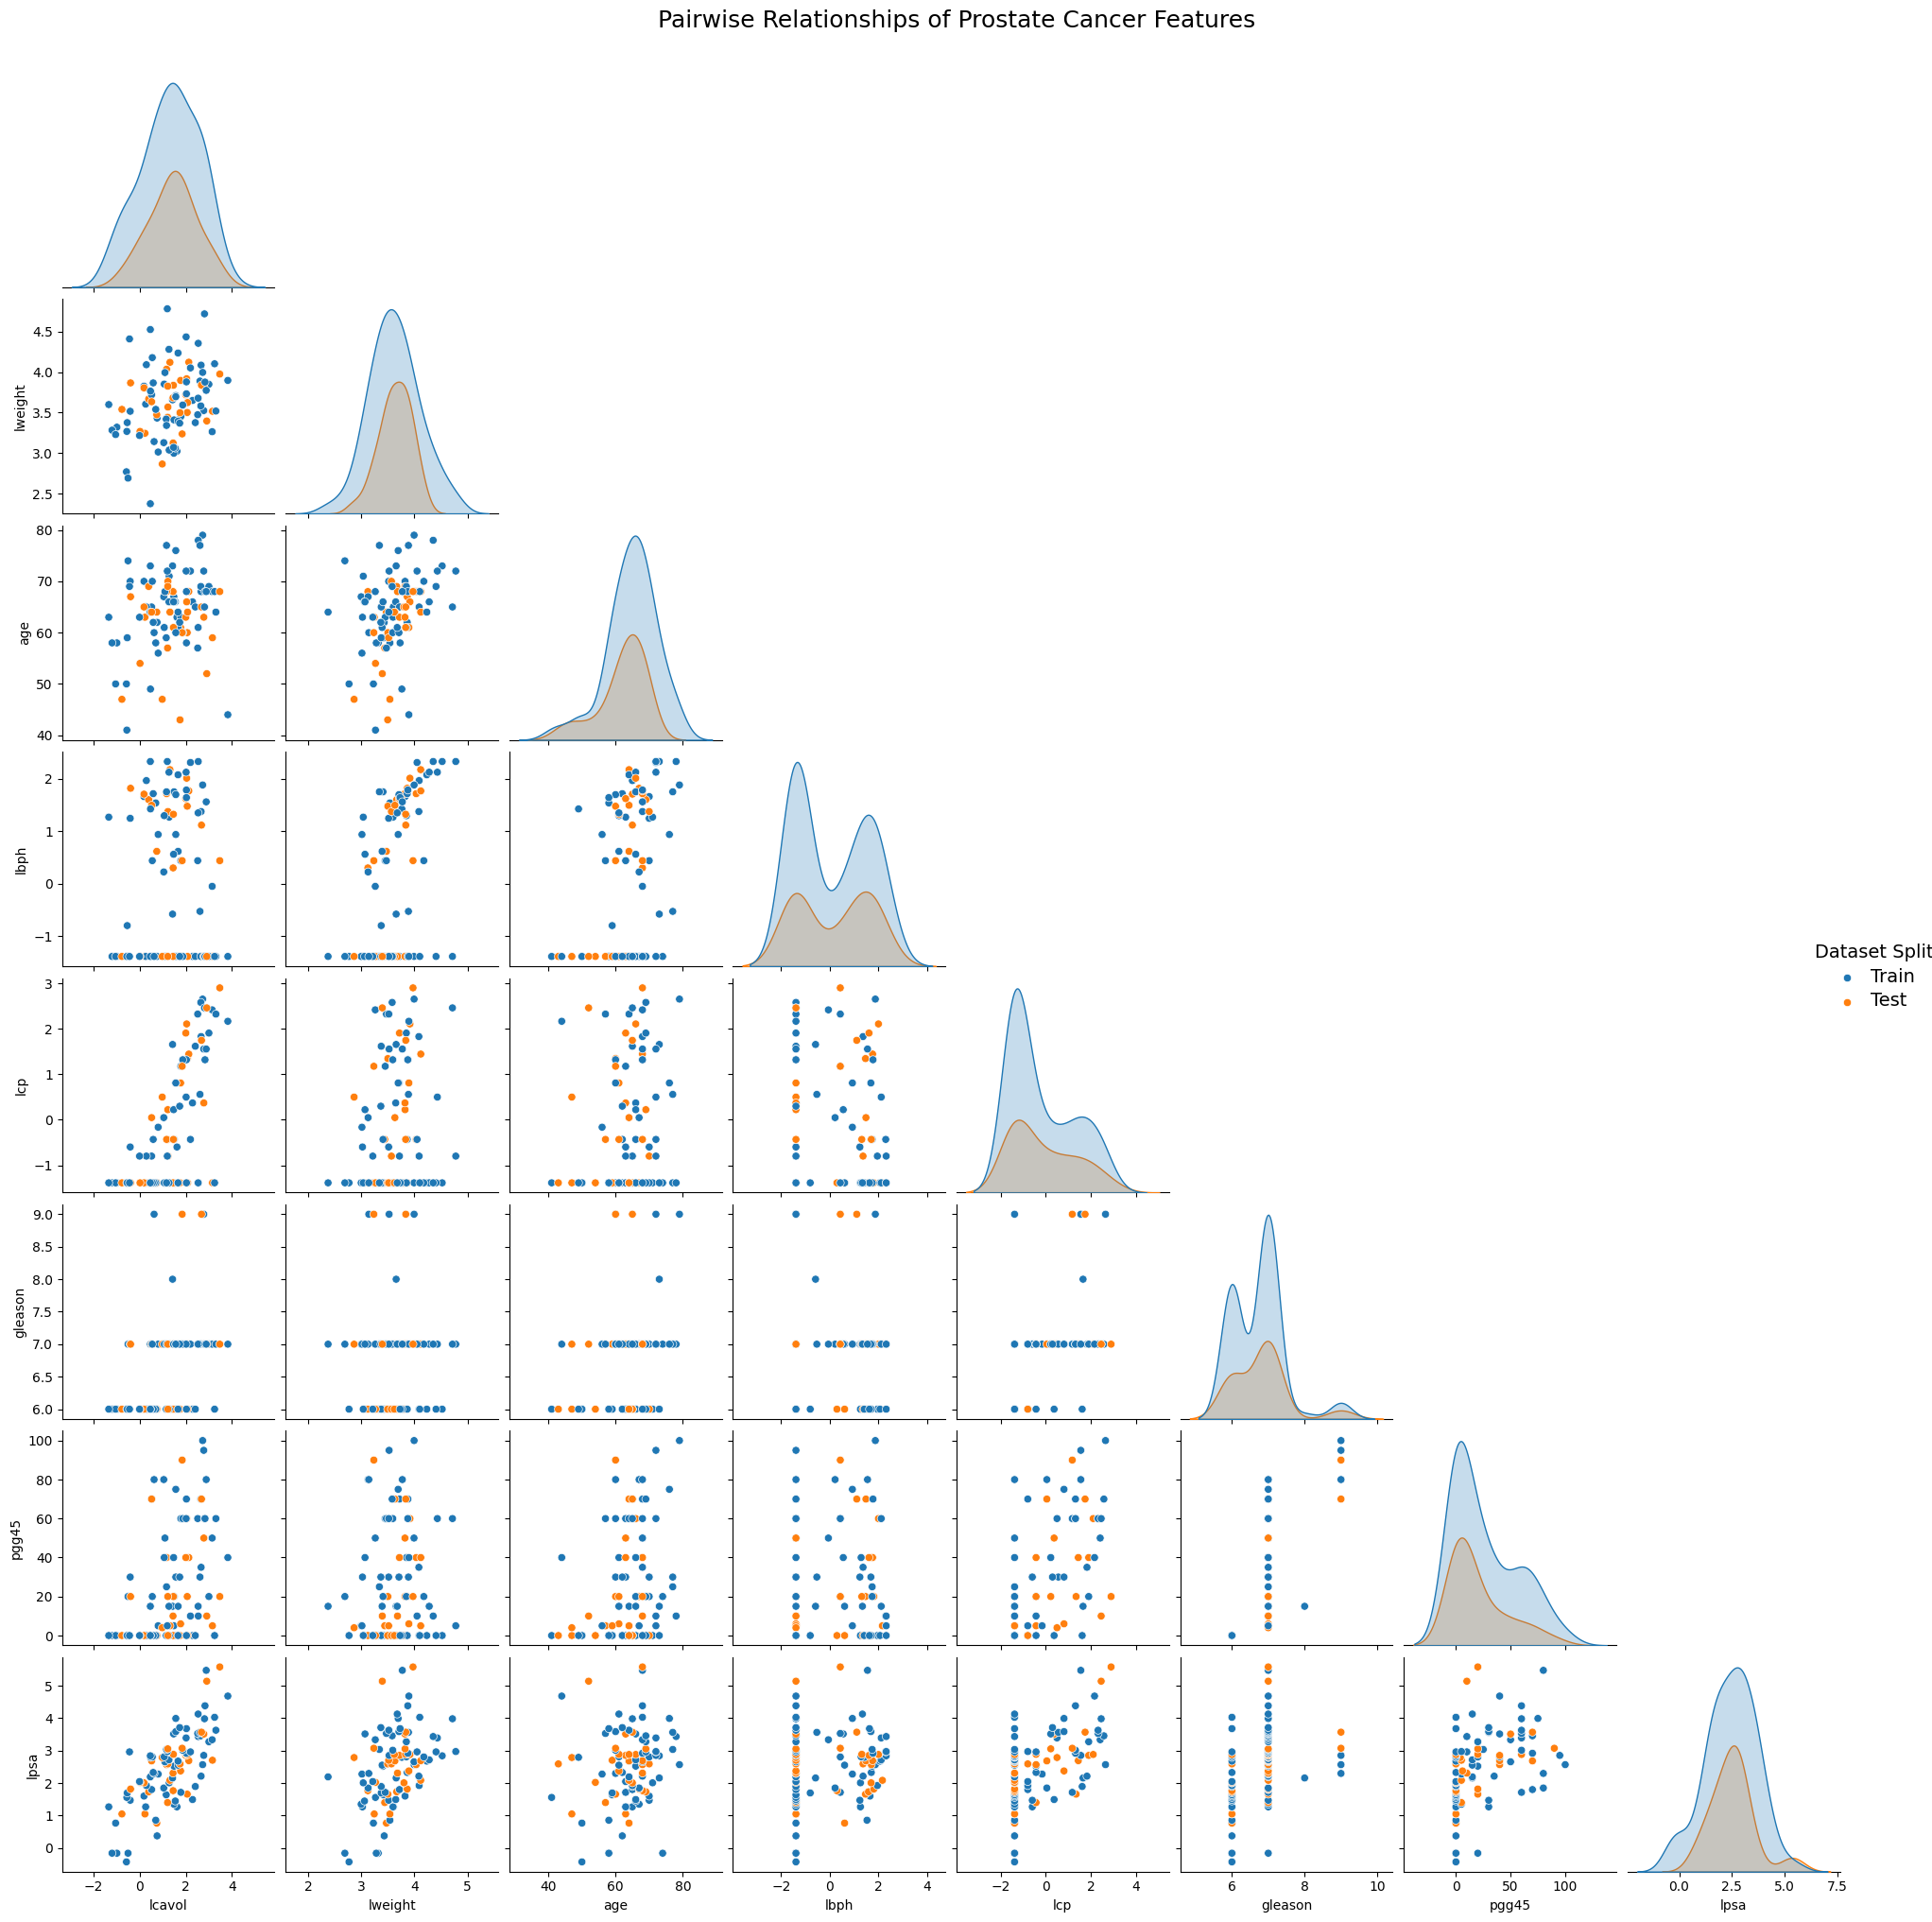

In [12]:
g = sns.pairplot(
    df,
    vars=["lcavol", "lweight", "age", "lbph", "lcp", "gleason", "pgg45", "lpsa"],
    hue="train",
    corner=True # Remove duplicates
)

# Add title
g.fig.suptitle(
    "Pairwise Relationships of Prostate Cancer Features",
    fontsize=18,
    y=1.02
)

# Rename legend labels
new_labels = ["Train", "Test"]
for text, label in zip(g._legend.texts, new_labels):
    text.set_text(label)

# Legend title & sizing
g._legend.set_title("Dataset Split")
g._legend.get_title().set_fontsize(14)
for text in g._legend.texts:
    text.set_fontsize(14)
g._legend.set_bbox_to_anchor((1.0, 0.5))


Correlation Heatmap

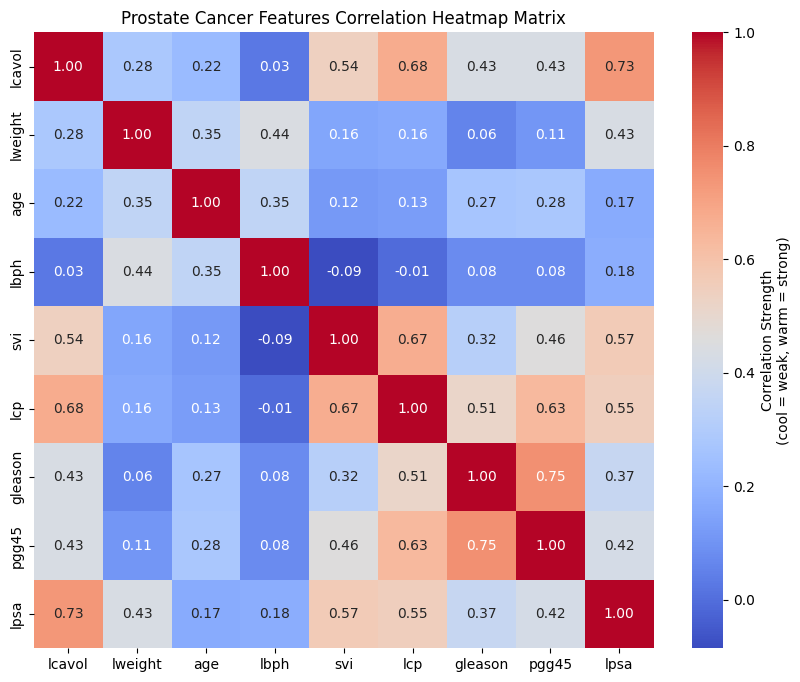

In [13]:
plt.figure(figsize=(10, 8))

ax = sns.heatmap(
    df[clean_cols].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"label": "Correlation Strength\n(cool = weak, warm = strong)"}
)

plt.title("Prostate Cancer Features Correlation Heatmap Matrix")
plt.show()

Reverse the Log Forms Back to Original

In [14]:
# Collect log variables
log_vars = [
    "lcavol",   
    "lweight",  
    "lbph",     
    "lcp",      
    "lpsa"      
]

df_exp = df.copy() # Make a copy

# Take reverse log
for col in log_vars:
    df_exp[col + "_exp"] = np.exp(df_exp[col])

Plot Log vs. Original Scales

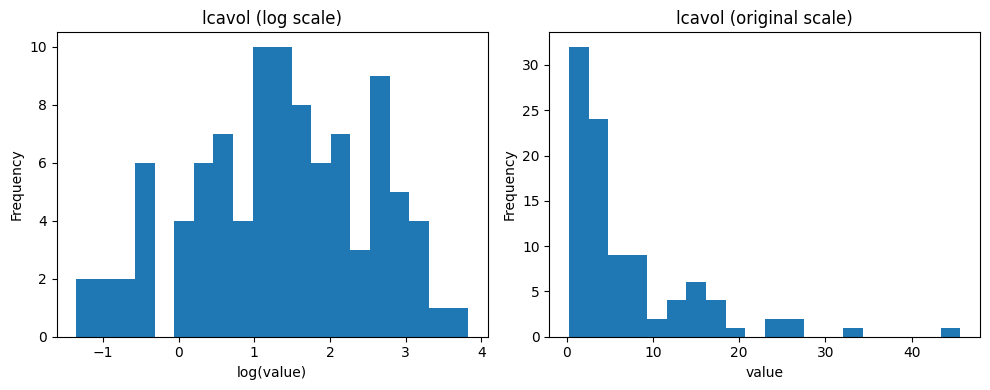

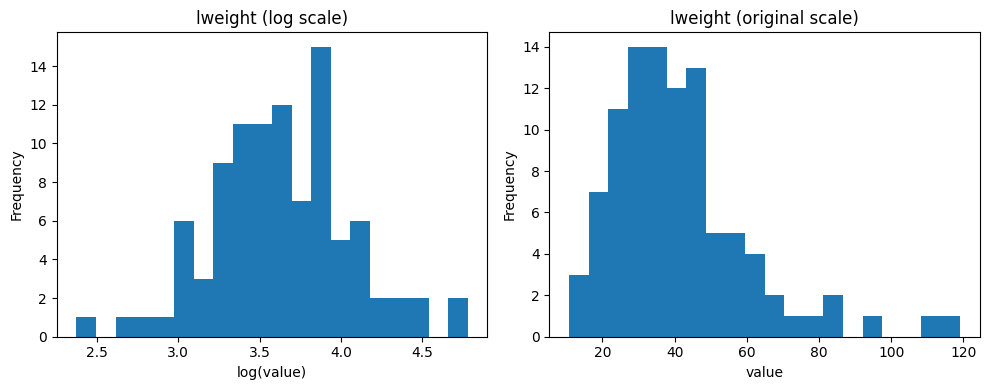

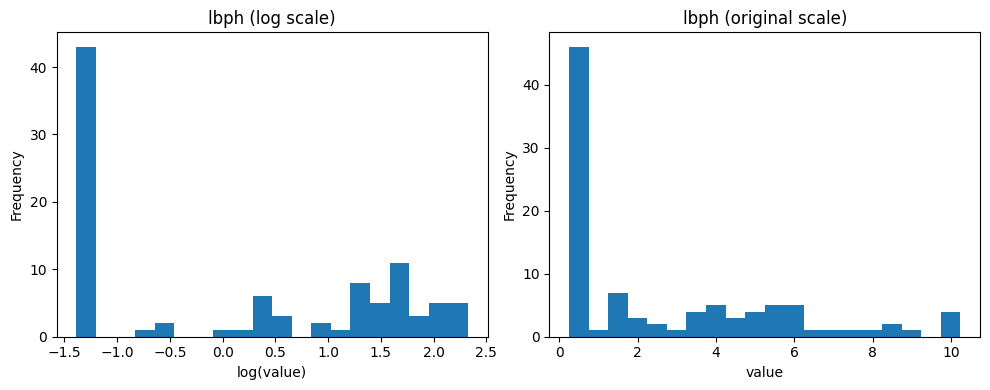

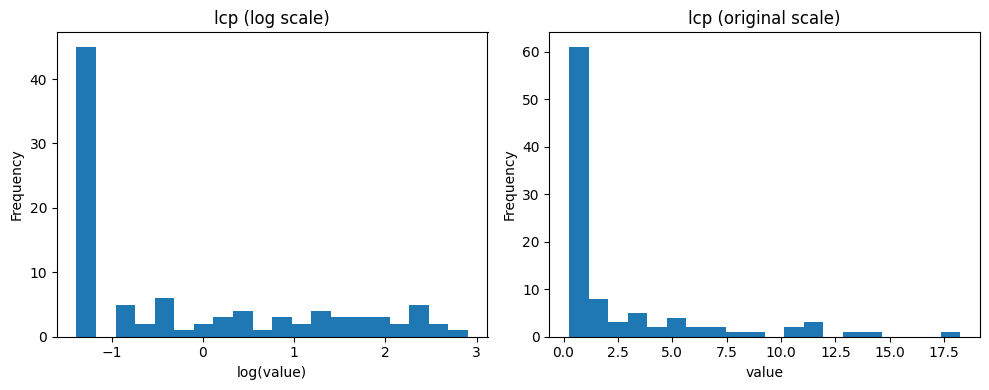

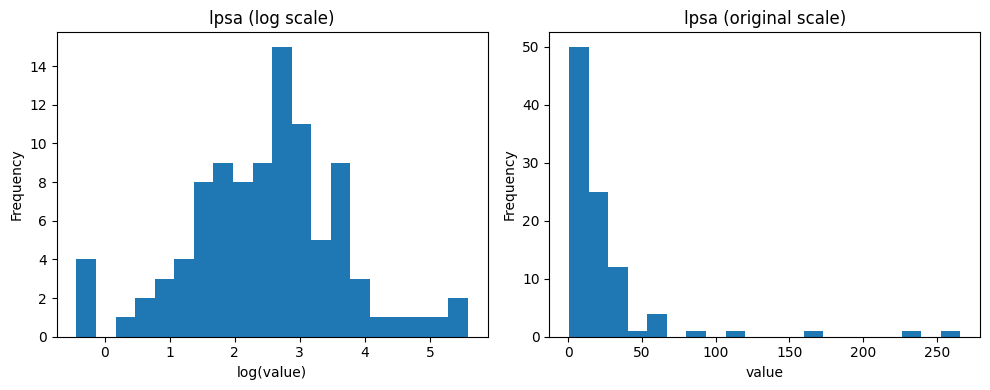

In [15]:
for col in log_vars:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Logged version
    axes[0].hist(df[col], bins=20)
    axes[0].set_title(f"{col} (log scale)")
    axes[0].set_xlabel("log(value)")
    axes[0].set_ylabel("Frequency")

    # Original-scale version
    axes[1].hist(df_exp[col + "_exp"], bins=20)
    axes[1].set_title(f"{col} (original scale)")
    axes[1].set_xlabel("value")
    axes[1].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()

Split Train & Test, Report ntrain & ntest

In [16]:
train_df = df[df["train"] == "T"].copy()
test_df  = df[df["train"] == "F"].copy()

ntrain = train_df.shape[0]
ntest = test_df.shape[0]

ntrain, ntest

(67, 30)

Transfer to R for further analysis

Conclusions from initial EDA:
- Our pairplot showed two overlaid distributions of training and testing data down the diagonal for each feature where they mostly overlap which demonstrates a good split.
- Why do many variables appear log-transformed and what does that imply for interpretation? By reversing the log and plotting the original data of each log variable, we see that the original distributions are rightly skewed with long tails and much higher variances. The log compresses the extreme values that would violate our linear model assumptions, providing a more symmetric shape.
- From our correlation heatmap, we've identified the top 3 predictors with a score higher than 0.50. These 3 predictors are lcavol (0.73), svi (0.57), and lcp (0.55). 